<a href="https://colab.research.google.com/github/Jassibro/EDA-PROJECT/blob/main/EDA_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - HOTEL BOOKING ANALYSIS



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Jassibro/EDA-PROJECT.git

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

To gain insights and make data-driven decisions to optimize the hotel's operations and improve customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [185]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
%matplotlib inline

### Dataset Loading

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
path='/content/drive/MyDrive/Hotel Bookings.csv'

In [188]:
# Load Dataset
df=pd.read_csv(path,parse_dates=['reservation_status_date'])

### Dataset First View

In [189]:
# Dataset First Look
pd.set_option('display.max_columns',32)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [190]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [191]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [192]:
# Dataset Duplicate Value Count
df1=df.copy()
df1[df1.duplicated()].count()

hotel                             31994
is_canceled                       31994
lead_time                         31994
arrival_date_year                 31994
arrival_date_month                31994
arrival_date_week_number          31994
arrival_date_day_of_month         31994
stays_in_weekend_nights           31994
stays_in_week_nights              31994
adults                            31994
children                          31994
babies                            31994
meal                              31994
country                           31958
market_segment                    31994
distribution_channel              31994
is_repeated_guest                 31994
previous_cancellations            31994
previous_bookings_not_canceled    31994
reserved_room_type                31994
assigned_room_type                31994
booking_changes                   31994
deposit_type                      31994
agent                             27847
company                            1538


In [193]:
df1.drop_duplicates(inplace=True)
df1.shape

(87396, 32)

#### Missing Values/Null Values

In [194]:
# Missing Values/Null Values Count
na_values=df1.isna().sum()
na_values

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


<AxesSubplot:>

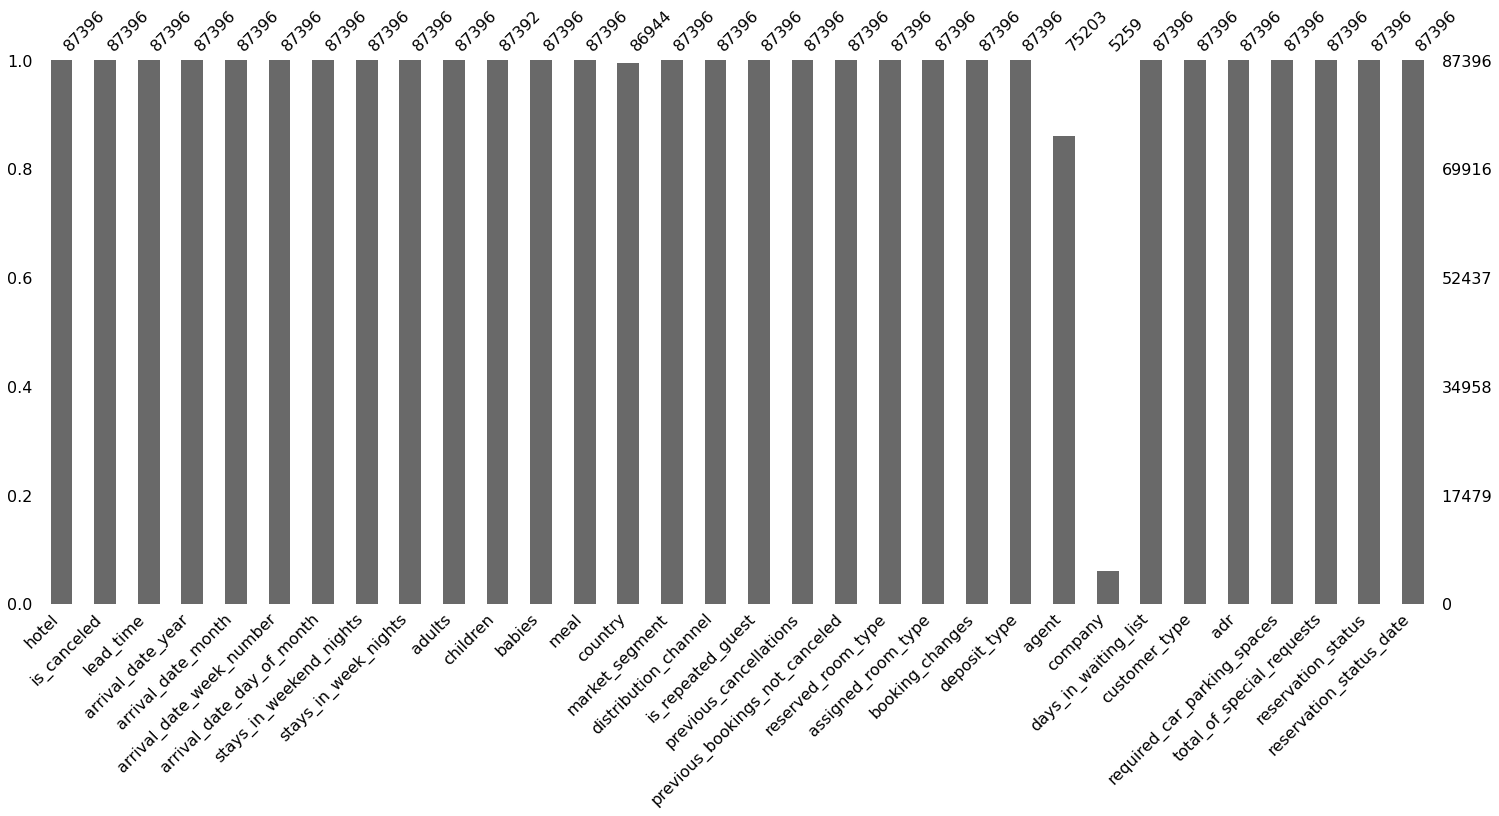

In [196]:
# Visualizing the missing values
plt.plot(figsize=(200,100))
msno.bar(df1)

In [197]:
# Filling null vlaues with 0.
df1.fillna(0,inplace=True)

### What did you know about your dataset?

The dataset consists of 119390 Rows and 32 Columns.In the Dataset most of the columns have 31994 duplicated values and the columns agent and company have 27487 and 1538 duplicated values respectively.The dataframe have datatypes as follow- datetime64[[ns]](1), float64(4), int64(16), object(11). In the entire dataset there are null/missing values only in 4 columns viz. country,children,agent and company.

## ***2. Understanding Your Variables***

In [198]:
# Dataset Columns
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [199]:
# Dataset Describe
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Text(0.5, 1.0, 'adr')

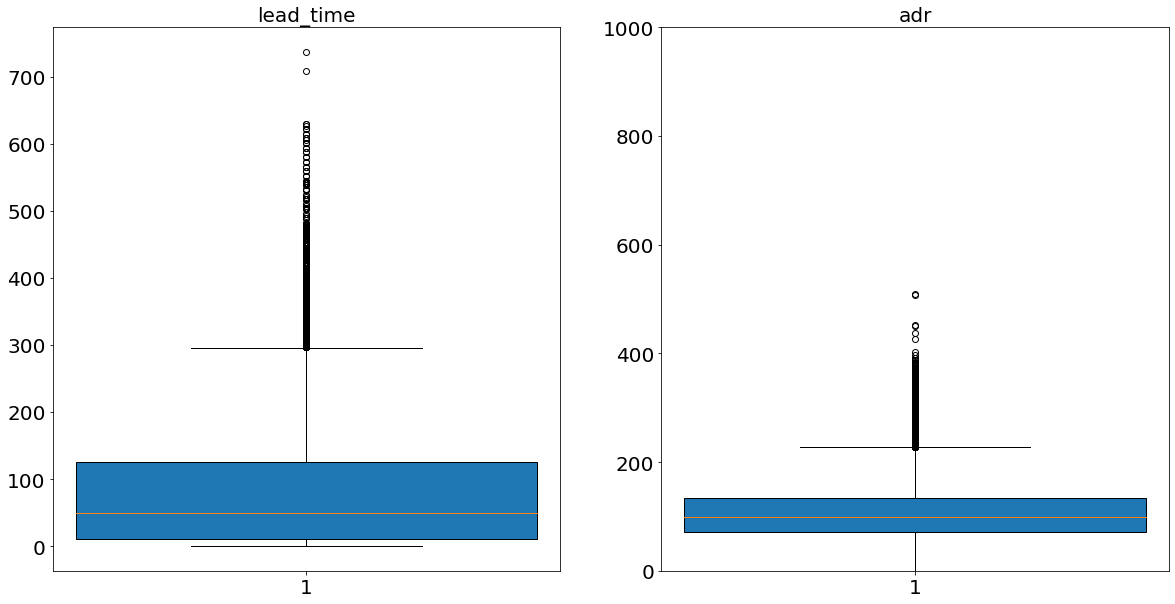

In [200]:
fig,axs= plt.subplots(1, 2, figsize=(20, 10))
axs[0].boxplot(df1['lead_time'], widths=5, patch_artist=True);
axs[0].tick_params(axis='both', labelsize=20)
axs[0].set_title("lead_time",fontsize=20)
axs[1].boxplot(df1["adr"],widths=5,patch_artist=True);
axs[1].set_ylim([0, 1000])
axs[1].tick_params(axis='both', labelsize=20)
axs[1].set_title("adr",fontsize=20)

In [209]:

indices_to_drop=df1[df1['lead_time']>365].index
df1.drop(indices_to_drop,inplace=True)


In [231]:
indices_to_be_dropped=df1[(df1['adr']<=0) | (df1['adr']>500)].index
df1.drop(indices_to_be_dropped,inplace=True)

In [238]:
df1.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
89075,City Hotel,0,100,2016,May,21,15,2,0,3,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,F,4,No Deposit,9.0,0.0,0,Transient,210.60,0,2,Check-Out,2016-05-17
1910,Resort Hotel,1,33,2015,September,39,21,1,1,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,208.0,0.0,0,Transient-Party,90.00,0,0,Canceled,2015-08-20
67931,City Hotel,1,83,2017,May,19,9,0,5,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,127.98,0,0,Canceled,2017-04-22
101839,City Hotel,0,3,2016,November,47,14,1,4,2,0.0,1,BB,ESP,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0.0,0,Transient,94.35,0,2,Check-Out,2016-11-19
58370,City Hotel,1,35,2016,October,42,11,0,3,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,151.50,0,1,Canceled,2016-09-09
448,Resort Hotel,0,19,2015,July,29,16,0,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,0.0,0,Transient,121.33,0,1,Check-Out,2015-07-19
26444,Resort Hotel,0,4,2016,July,31,26,1,5,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,196.00,0,1,Check-Out,2016-08-01
20617,Resort Hotel,0,0,2016,February,6,4,0,1,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,0.0,0,Transient,39.00,0,0,Check-Out,2016-02-05
47024,City Hotel,1,9,2016,February,6,4,0,3,2,0.0,0,SC,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,79.00,0,0,Canceled,2016-01-31
89697,City Hotel,0,0,2016,May,22,23,1,1,1,0.0,0,BB,ESP,Direct,Direct,0,0,0,A,B,0,No Deposit,0.0,0.0,0,Transient,152.00,0,0,Check-Out,2016-05-25


In [246]:
wrong_value_indices=df1[(df1['adults'] + df1['children'] + df1['babies'] == 0 )].index
df1.drop(wrong_value_indices,inplace=True)
df1.shape

(85036, 32)

### Variables Description 

####**hotel:** the name or type of hotel (e.g., resort hotel, city hotel)
####**is_canceled:** a binary variable indicating whether the booking was canceled (1) or not (0)
####**lead_time:** the number of days between the booking date and the arrival date
####**arrival_date_year:** the year of the arrival date
####**arrival_date_month:** the month of the arrival date
####**arrival_date_week_number:** the week number of the arrival date within the year
####**arrival_date_day_of_month:** the day of the month of the arrival date
####**stays_in_weekend_nights:** the number of weekend nights (i.e., Friday, Saturday) the customer stayed
####**stays_in_week_nights:** the number of weekday nights (i.e., Sunday to Thursday) the customer stayed
####**adults:** the number of adults included in the booking
####**children:** the number of children included in the booking
####**babies:** the number of babies included in the booking
####**meal:** the type of meal included in the booking (e.g., breakfast, full board)
####**country:** the country of origin of the customer
####**market_segment:** the type of market segment the booking belongs to (e.g., corporate, group, online TA)
####**distribution_channel:** the booking distribution channel (e.g., travel agent, direct)
####**is_repeated_guest:** a binary variable indicating whether the customer is a repeat guest (1) or not (0)
####**previous_cancellations:** the number of previous bookings that were canceled by the customer
####**previous_bookings_not_canceled:** the number of previous bookings that were not canceled by the customer
####**reserved_room_type:** the type of room reserved by the customer
####**assigned_room_type:** the type of room assigned to the customer at check-in
####**booking_changes:** the number of changes made to the booking before check-in
####**deposit_type:** the type of deposit made for the booking (e.g., no deposit, non-refundable)
####**agent:** the ID of the travel agent that made the booking (if applicable)
####**company:** the ID of the company that made the booking (if applicable)
####**days_in_waiting_list:** the number of days the booking was on the waiting list before it was confirmed
####**customer_type:** the type of customer (e.g., transient, contract, group)
####**adr:** the average daily rate (i.e., the total booking revenue divided by the number of nights stayed)
####**required_car_parking_spaces:** the number of car parking spaces required by the customer
####**total_of_special_requests:** the total number of special requests made by the customer (e.g., extra bed, late check-out)
####**reservation_status:** the current reservation status (e.g., canceled, checked-out)
####**reservation_status_date:** the date when the reservation status was last updated.

### Check Unique Values for each variable.

In [247]:
df1.nunique()

hotel                                2
is_canceled                          2
lead_time                          366
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             16
stays_in_week_nights                31
adults                               5
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              333
company                            344
days_in_waiting_list     

In [248]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [249]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [250]:
df1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [251]:
df1['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [252]:
df1['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

In [253]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Groups',
       'Complementary', 'Undefined', 'Aviation'], dtype=object)

In [254]:
df1['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [29]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### What all manipulations have you done and insights you found?

1.Made a copy of the original dataframe in df1.

2.From the dataframe calculated all the duplicated values and removed them from df1.

3.Found all the null/missing values from the dataframe and replaced it wtih 0.

4.Found the outliers from the plot and removed them from the dataframe.

5.From the observation from unique values in assigned_room_type and reserved_room_type, i concluded that room type I and K are never the reserved_room_type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***